In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Varun Sharma\\Desktop\s\\py_log_assignment_3')
%matplotlib inline 

In [2]:
ad_data = pd.read_csv('Social_Network_Ads.csv')
ad_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

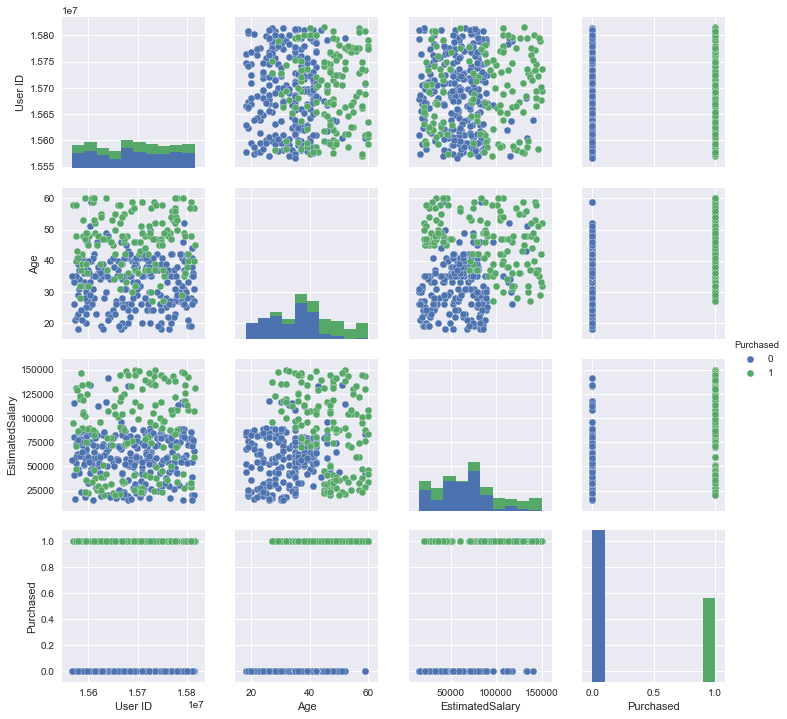

In [4]:
sns.pairplot(data = ad_data,hue = 'Purchased')

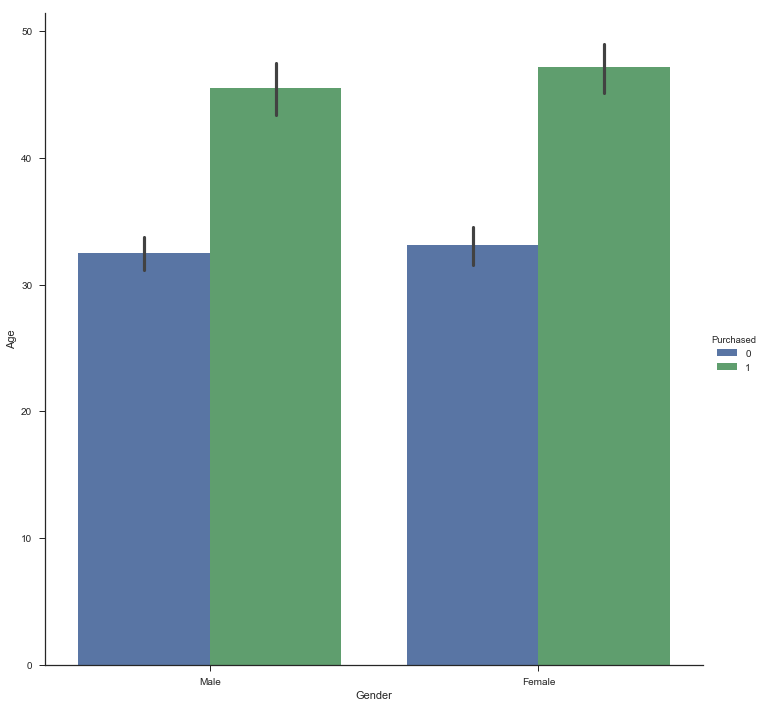

In [5]:
sns.set(style="ticks")
#plotting
a = sns.factorplot(x='Gender',y='Age',data= ad_data,kind='bar',hue = 'Purchased',size =10)

# Transforming and Preparing Varibles for the predictive analysis

In [6]:
dummies = pd.get_dummies(ad_data['Gender'])
df = pd.concat([ad_data,dummies],axis=1)
df = df.drop('Gender',axis=1)
df = df.drop('User ID',axis=1)
df.head()
# df['Purchased'].sum()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


# Splitting into test and train set

In [7]:
from sklearn.model_selection import train_test_split

Scaling the features to standardized values

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scale_features =['Age','EstimatedSalary','Female','Male']
df[scale_features] = sc_X.fit_transform(df[scale_features])
df.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,-1.781797,-1.490046,0,-1.020204,1.020204
1,-0.253587,-1.460681,0,-1.020204,1.020204
2,-1.113206,-0.785290,0,0.980196,-0.980196
3,-1.017692,-0.374182,0,0.980196,-0.980196
4,-1.781797,0.183751,0,-1.020204,1.020204


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size=0.30, 
                                                    random_state=101)

# Fitting the model

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predicting the test values

In [12]:
from sklearn.metrics import classification_report

In [13]:
predictions = logmodel.predict(X_test)

In [14]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.90      0.88        80
          1       0.78      0.70      0.74        40

avg / total       0.83      0.83      0.83       120



In [22]:

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
from sklearn import linear_model
DropF = X_train.drop('Female', axis = 1)
DropFt = X_test.drop('Female', axis = 1)
X = np.array(DropF)
Xt = np.array(DropFt)
 
p1 = go.Scatter(x=X.ravel(), y=y_train, 
                mode='markers',
                marker=dict(color='black'),
                showlegend=False
               )


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(Xt * logmodel.coef_ + logmodel.intercept_).ravel()

p2 = go.Scatter(x=Xt, y=loss, 
                mode='lines',
                line=dict(color='red', width=3),
                name='Logistic Regression Model')

layout = go.Layout(xaxis=dict(title='x', range=[-4, 10], zeroline=False),
                   yaxis=dict(title='y', range=[-0.25, 1.25], zeroline=False))

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)

# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(72, 8, 12, 28)

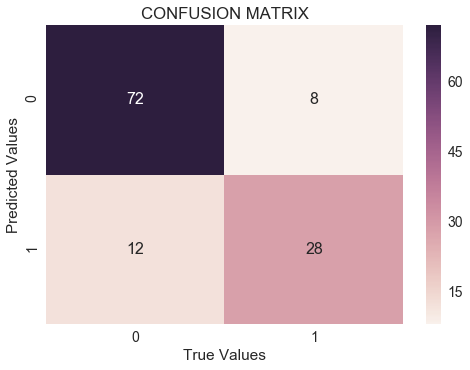

In [24]:
#Converting the array to a data frame to plot the confusion matrix
array = [[tn,fp],[fn,tp]]
array
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#for label size
sns.set(font_scale=1.4)
# font size
confusion_mat = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
confusion_mat.set(xlabel= 'True Values',ylabel= 'Predicted Values',title = 'CONFUSION MATRIX')